<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [1]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

zsh:1: command not found: gdown


In [3]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [6]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Pregnancies                 14
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

In [11]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

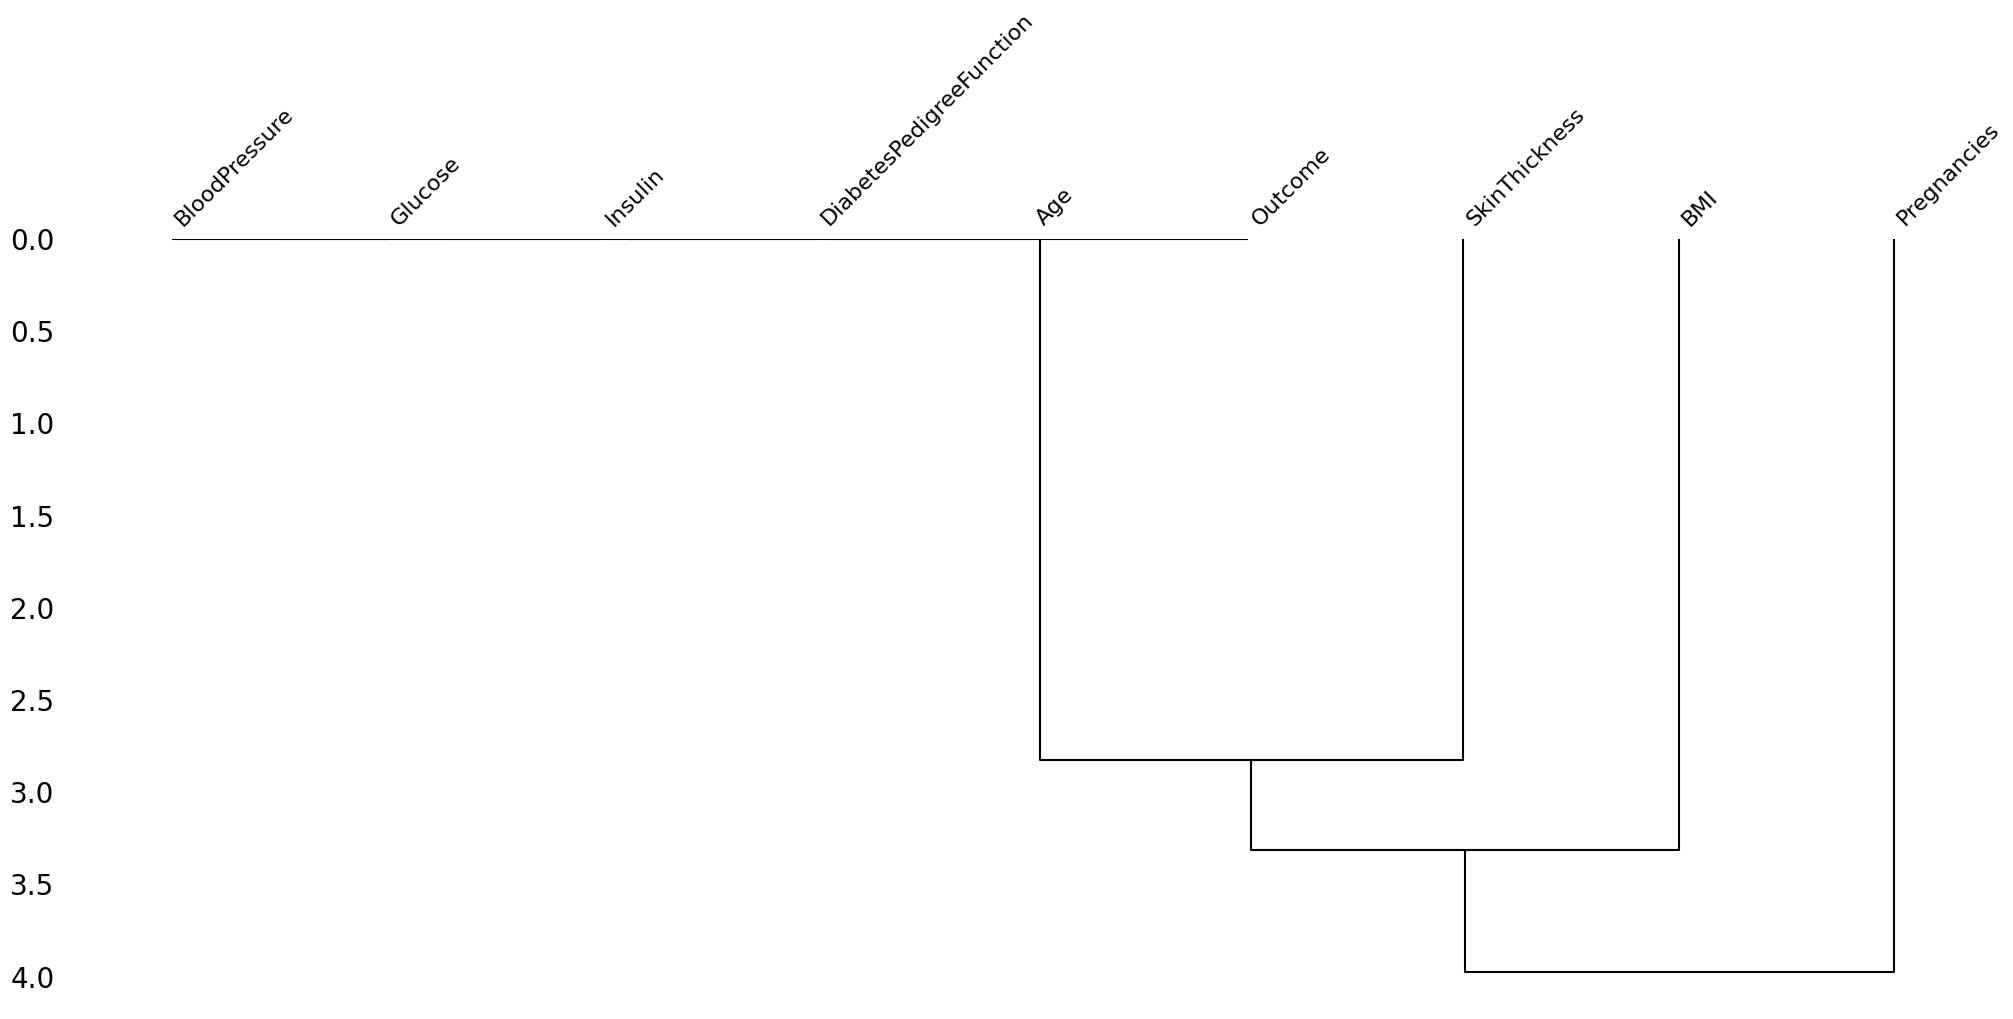

In [16]:
import missingno as msno
msno.dendrogram(df)

<Axes: >

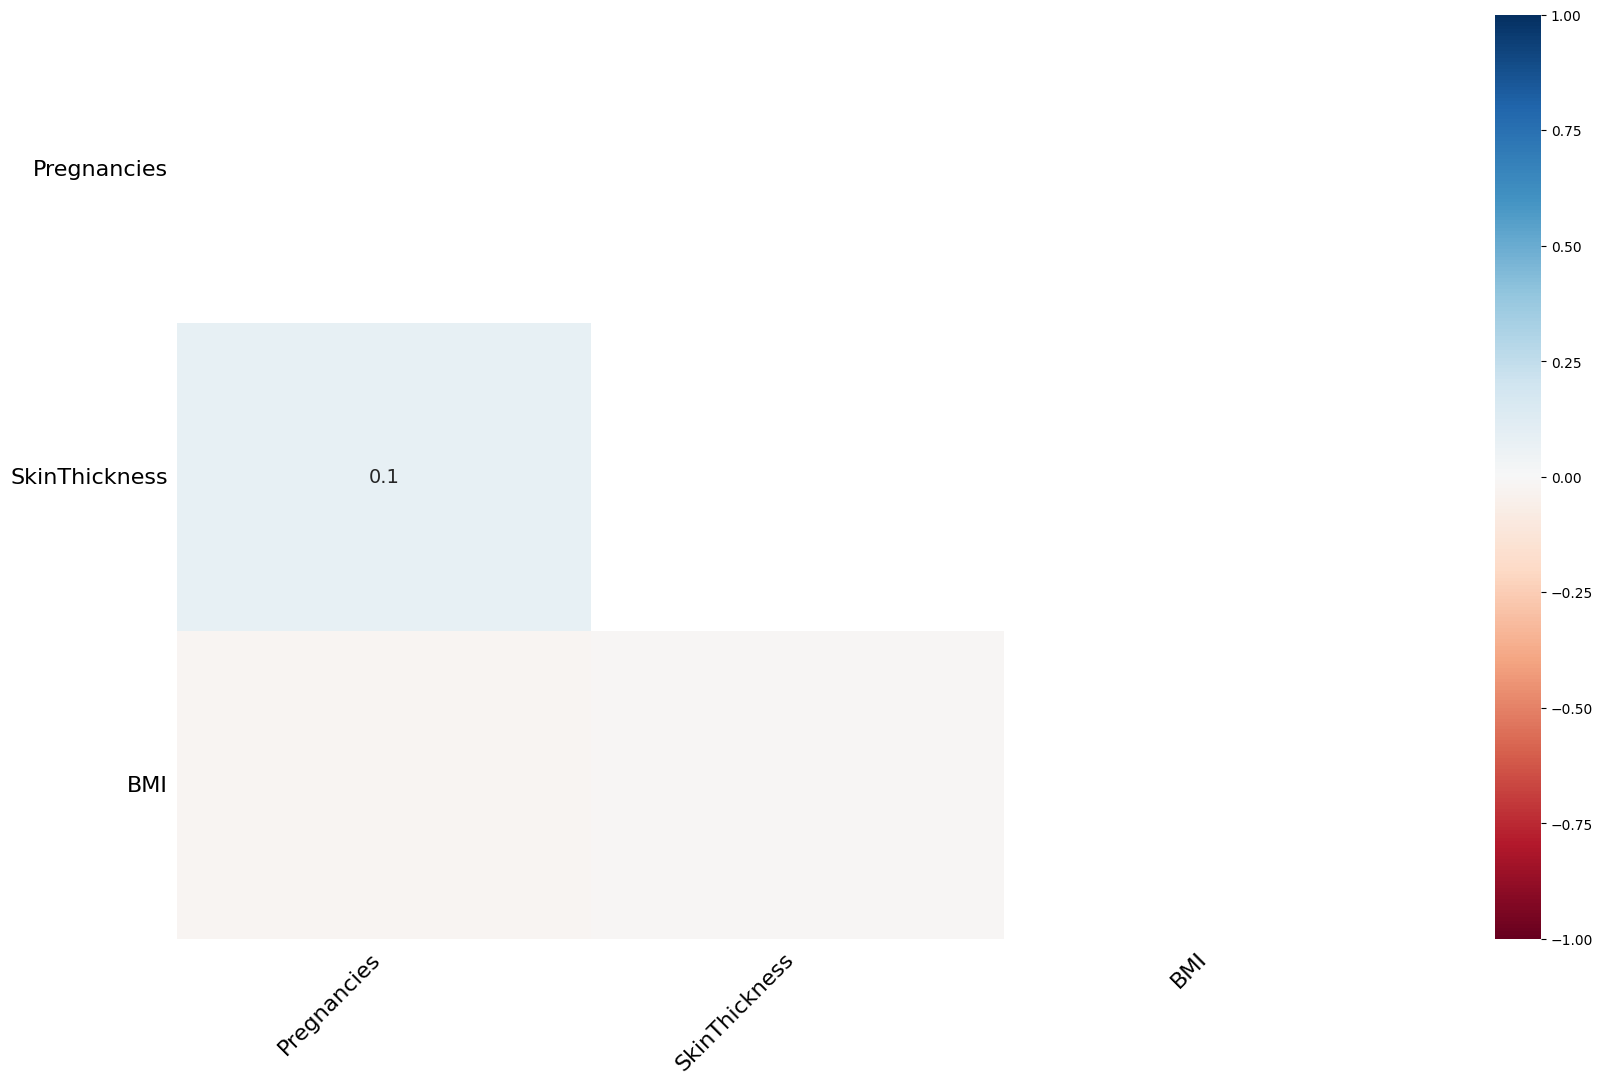

In [19]:
msno.heatmap(df)

## <font color = 'Orange'>Handle the missing values</font>

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

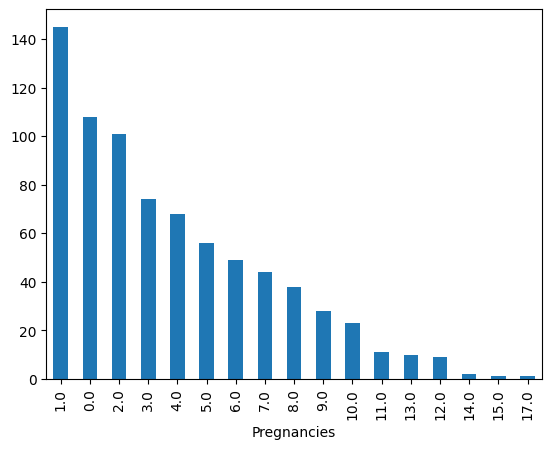

In [35]:
from sklearn.impute import SimpleImputer

df['Pregnancies'].value_counts().plot.bar()

frequent_imputer = SimpleImputer(strategy = 'most_frequent')

df['Pregnancies'] = frequent_imputer.fit_transform(df['Pregnancies'].values.reshape(-1,1))
df.isnull().sum()

In [39]:
bmi_mean = df['BMI'].mean()

df['BMI'] = df['BMI'].fillna(bmi_mean)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               8
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
skin_thickness_median = df.SkinThickness.median()
df.SkinThickness = df.SkinThickness.fillna(skin_thickness_median)

df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [52]:
df.to_csv('cleaned_diabetes.csv')

Print the first rows of your final Dataset

In [55]:
cleaned_df = pd.read_csv('cleaned_diabetes.csv')
cleaned_df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,4,0.0,137,40,35.0,168,43.1,2.288,33,1


# <font color='orange'>KNN Classification</font>

## <font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [57]:
target = 'Outcome'
X = cleaned_df.drop(target,axis=1)
Y = cleaned_df[target]
X

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6.0,148,72,35.0,0,33.6,0.627,50
1,1,1.0,85,66,29.0,0,26.6,0.351,31
2,2,8.0,183,64,0.0,0,23.3,0.672,32
3,3,1.0,89,66,23.0,94,28.1,0.167,21
4,4,0.0,137,40,35.0,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...
763,763,10.0,101,76,48.0,180,32.9,0.171,63
764,764,2.0,122,70,27.0,0,36.8,0.340,27
765,765,5.0,121,72,23.0,112,26.2,0.245,30
766,766,1.0,126,60,0.0,0,30.1,0.349,47


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)
print("X Train set length:", len(X_train))
print("X Test set length:", len(X_test))
print("Y Train set length:", len(Y_train))
print("Y Test set length:", len(Y_test))

X Train set length: 614
X Test set length: 154
Y Train set length: 614
Y Test set length: 154


## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)

KNeighborsClassifier()

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [92]:
Y_pred = model.predict(X_test)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [93]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       109
           1       0.53      0.47      0.49        45

    accuracy                           0.72       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.71      0.72      0.72       154

